## Global Power Plant Database

### Problem Statement

#### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Fuel Type   2) capacity_mw 

### Importing Libraries

In [2]:
#Importing Libraries

import pandas as pd # for handling dataset
import numpy as np  # for mathematical computation

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy.stats import skew

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import plotly.express as px
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [173]:
# reading the data
df=pd.read_csv(r'D:\DATATRAINED\DTRND-Project\EVALUATION\2nd week\database_IND.csv') 

In [174]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


### Dataset Description

The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    
`country_long` (text): longer form of the country designation
    
`name` (text): name or title of the power plant, generally in Romanized form
    
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
    
`capacity_mw` (number): electrical generating capacity in megawatts
    
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    
`primary_fuel` (text): energy source used in primary electricity generation or export
    
`other_fuel1` (text): energy source used in electricity generation or export
    
`other_fuel2` (text): energy source used in electricity generation or export
    
`other_fuel3` (text): energy source used in electricity generation or export
    
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
    
`owner` (text): majority shareholder of the power plant, generally in Romanized form
    
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
    
`url` (text): web document corresponding to the `source` field
    
`geolocation_source` (text): attribution for geolocation information
    
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    
`year_of_capacity_data` (number): year the capacity information was reported
    
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
    
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
    
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
    
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
    
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
    
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
    
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
    
`generation_data_source` (text): attribution for the reported generation information
    
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
    
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
    
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
    
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
    
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
    
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
    
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
    
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
    
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

In [175]:
print('Total no of rows & columns: ',df.shape) # to check number of rows & columns

Total no of rows & columns:  (908, 25)


In [176]:
print('List of columns: ',df.columns) # to display all the columns name in the dataset

List of columns:  Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')


In [177]:
df.info() # to know datatype of each columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

## Predicting for Fuel Type

In [178]:
# dropping 'capacity_mw' column as its a two target problem. So first we will predict for 'FUEL TYPE'.
df=df.drop(columns=['capacity_mw'])

In [179]:
# to list categorical features in our dataset
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
cat_features

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'generation_data_source']

In [180]:
# to list continous features in our dataset
con_features=[i for i in df.columns if df.dtypes[i]=='float64']
con_features

['latitude',
 'longitude',
 'other_fuel3',
 'commissioning_year',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'estimated_generation_gwh']

In [181]:
df.describe() # to get high understanding of dataset or to get overview/stats of the dataset

,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


#### 
Data is messed up for generation_gwh_(2013,2014,2015,2016,2017) as their standard deviation value is greater than mean value. 

Also the count for each column is not same that means null values is present.

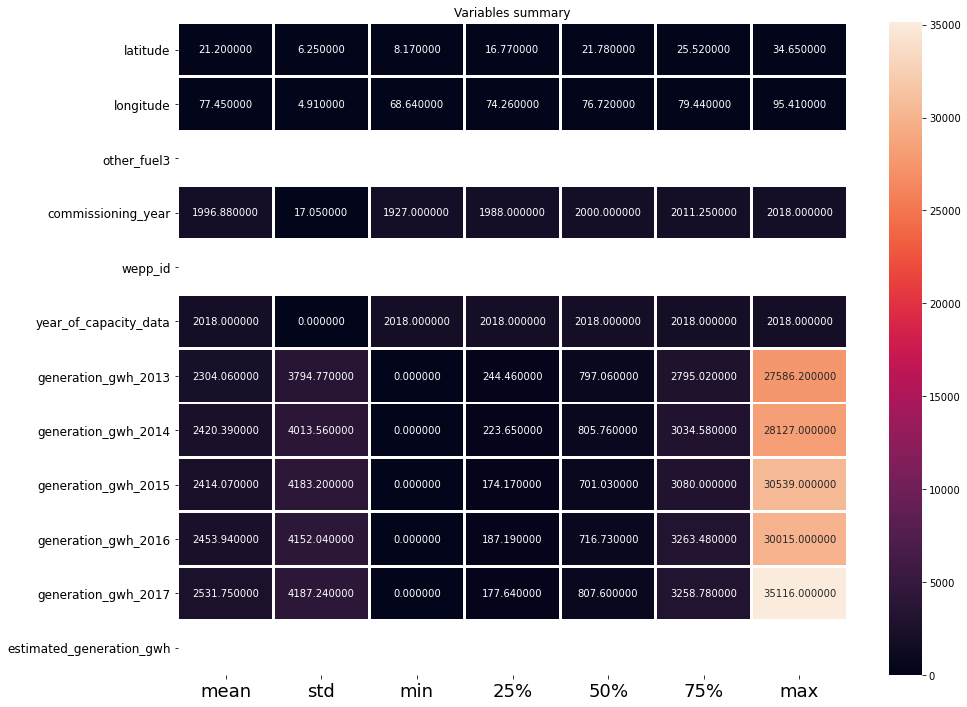

In [182]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

#### From the above plotting we are determining mean, standard deviation, minimum and maximum values of each column. It helps us further in data cleaning.

<AxesSubplot:xlabel='generation_data_source', ylabel='count'>

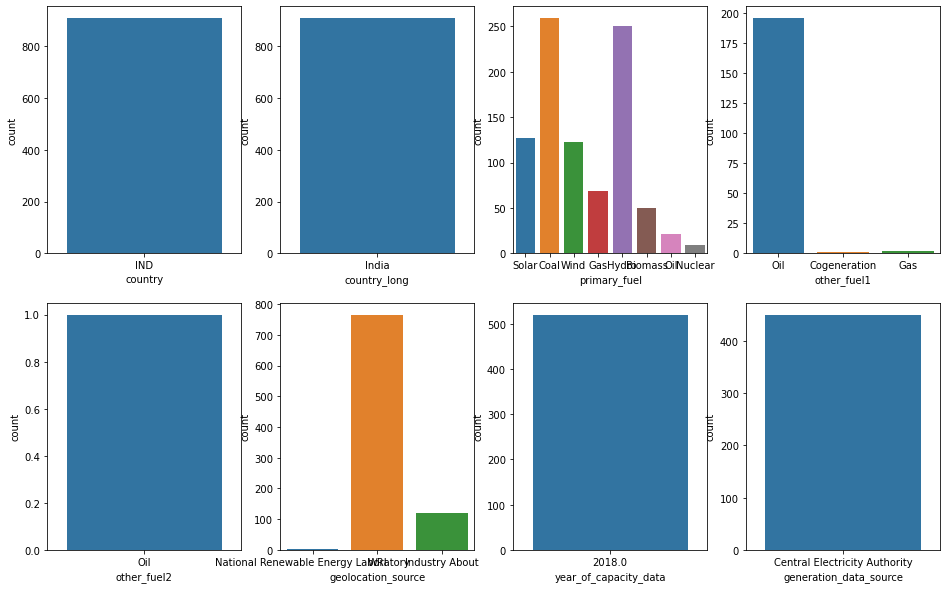

In [183]:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('country',data=df,ax=ax[0][0])
sns.countplot('country_long',data=df,ax=ax[0][1])
sns.countplot('primary_fuel',data=df,ax=ax[0][2])
sns.countplot('other_fuel1',data=df,ax=ax[0][3])
sns.countplot('other_fuel2',data=df,ax=ax[1][0])
sns.countplot('geolocation_source',data=df,ax=ax[1][1])
sns.countplot('year_of_capacity_data',data=df,ax=ax[1][2])
sns.countplot('generation_data_source',data=df,ax=ax[1][3])

#### Inferences from above plot

1. All the power plants data present in the dataset belongs to country code IND (India).

2. For all power plants in the dataset only country India is there that represents where the power plants are situated.

3. Coal & Hydro has the maximum number of counts in primary fuel.

4. Oil is used mostly with traces of cogeneration & gas shown also for generation of electricity.

5. Oil is only used as a energy source.

6. World Resources Institute (WRI) has its highest number for geolocation source of power plants.

7. The data related to capacities of power plants was reported only on year 2018.

8. The generation information was reported by only Central Electricity Authority.

In [184]:
df.isnull().sum()  # to check null values

country                       0
country_long                  0
name                          0
gppd_idnr                     0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

#### 
1. Features having 100% null values     ---> other_fuel3, wepp_id, estimated_generation_gwh                          

2. Features having (50-57%) null values ---> (generation_gwh_2013,2014,2015,2016,2017), generation_data_source 

3. Features having (41-43%) null values  ---> commissioning_year and year_of_capacity_data 

4. latitude & longitude has 5% null values

5. other_fuel1 has 78% and other_fuel2 has 99% null values

In [185]:
# dropping features with 100%  and above 75% null values 
df=df.drop(columns=['other_fuel3','wepp_id','estimated_generation_gwh','other_fuel1','other_fuel2'])

In [186]:
# dropping column having only character identifier
df=df.drop(columns=['gppd_idnr'])

In [187]:
# dropping this column as it has 62% null values and value is little same as source column.
df=df.drop(columns=['owner'])

In [188]:
# treating null values 
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())

In [189]:
# to count number of unique values in each columns 
df.nunique()

country                     1
country_long                1
name                      908
latitude                  838
longitude                 829
primary_fuel                8
commissioning_year         73
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2013       365
generation_gwh_2014       374
generation_gwh_2015       398
generation_gwh_2016       405
generation_gwh_2017       410
generation_data_source      1
dtype: int64

#### country,country_long,year_of_capacity_data and generation_data_source has 1 unique value throughout.

In [190]:
# dropping columns having same unique value throughout and url also because it is irrelevant for our prediction
df=df.drop(columns=['country','country_long','year_of_capacity_data','generation_data_source','url'])

In [191]:
# to count sum of 0's present 
print('Total no of zeros in generation_gwh_2017 is:',sum(df['generation_gwh_2017']==0))
print('Total no of zeros in generation_gwh_2016 is:',sum(df['generation_gwh_2016']==0))
print('Total no of zeros in generation_gwh_2015 is:',sum(df['generation_gwh_2015']==0))
print('Total no of zeros in generation_gwh_2014 is:',sum(df['generation_gwh_2014']==0))
print('Total no of zeros in generation_gwh_2013 is:',sum(df['generation_gwh_2013']==0))

Total no of zeros in generation_gwh_2017 is: 33
Total no of zeros in generation_gwh_2016 is: 31
Total no of zeros in generation_gwh_2015 is: 28
Total no of zeros in generation_gwh_2014 is: 28
Total no of zeros in generation_gwh_2013 is: 21


#### Sum of zero electricity generation in gigawatt-hours from(2013-2017)

In [192]:
# filling zero with mean value
df['generation_gwh_2017']=df['generation_gwh_2017'].replace(0,df['generation_gwh_2017'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].replace(0,df['generation_gwh_2016'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].replace(0,df['generation_gwh_2015'].mean())
df['generation_gwh_2014']=df['generation_gwh_2014'].replace(0,df['generation_gwh_2014'].mean())
df['generation_gwh_2013']=df['generation_gwh_2013'].replace(0,df['generation_gwh_2013'].mean())

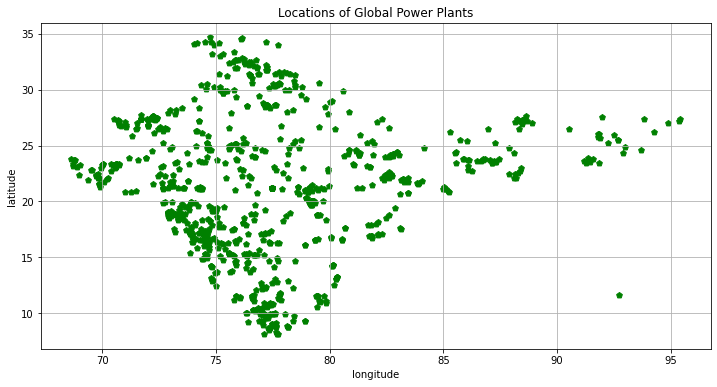

In [193]:
# to visualize 
x=df['longitude']
y=df['latitude']

plt.subplots(figsize=(12,6))
plt.scatter(x, y, c ="green",marker='p')
plt.title('Locations of Global Power Plants')
plt.xlabel('longitude')
plt.ylabel('latitude')
# To show the plot
plt.grid()
plt.show()

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

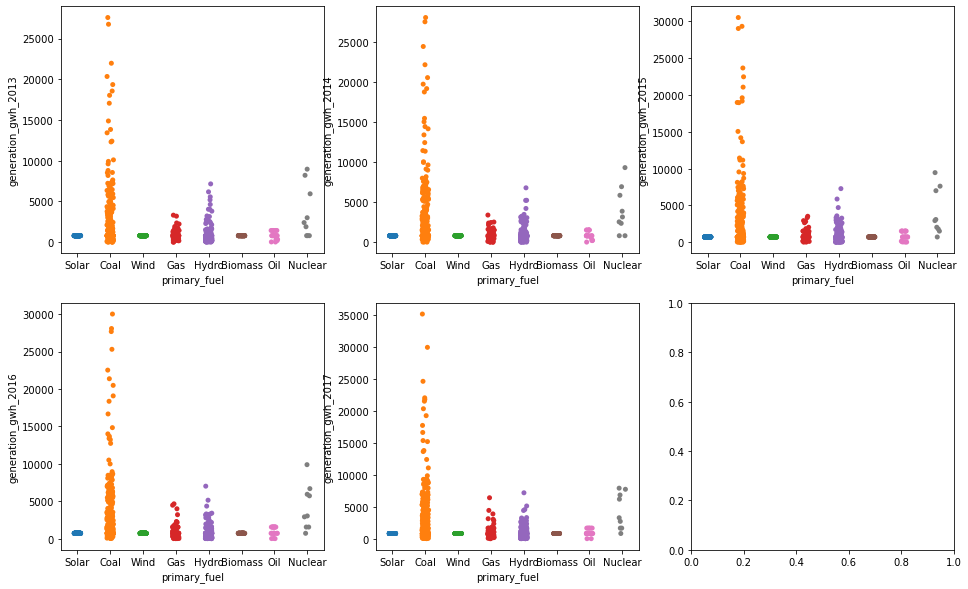

In [194]:
fig,ax = plt.subplots(2,3,figsize=(16,10))
sns.stripplot(x='primary_fuel', y='generation_gwh_2013', data=df,ax=ax[0][0])
sns.stripplot(x='primary_fuel', y='generation_gwh_2014', data=df,ax=ax[0][1])
sns.stripplot(x='primary_fuel', y='generation_gwh_2015', data=df,ax=ax[0][2])
sns.stripplot(x='primary_fuel', y='generation_gwh_2016', data=df,ax=ax[1][0])
sns.stripplot(x='primary_fuel', y='generation_gwh_2017', data=df,ax=ax[1][1])

#### Coal is majorly used as fuel for electricity generation in power plants from year 2013-2017.

In [195]:
df_new=['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

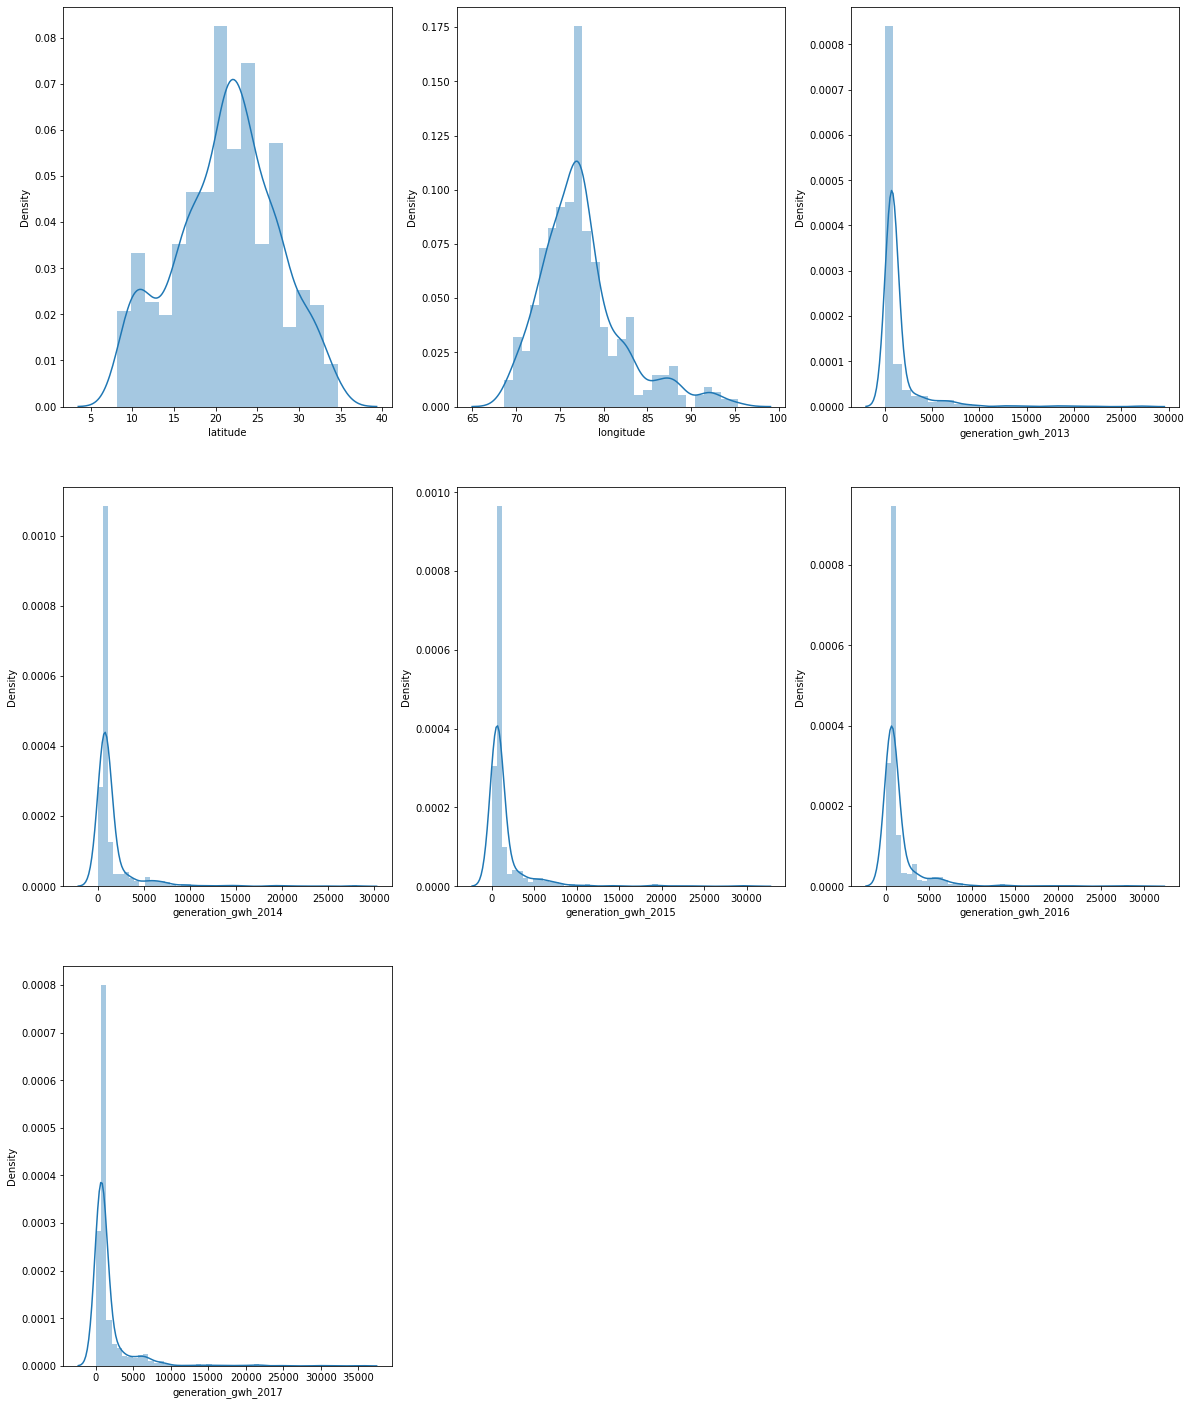

In [196]:
# lets visualize all the columns having continous values
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df_new:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [197]:
from scipy.stats import skew
# to see skewness for every continous column stored in data_new
for col in df_new:
    print(col)
    print(skew(df[col]))

latitude
-0.14714788027659784
longitude
1.127968707647393
generation_gwh_2013
5.5532865307886405
generation_gwh_2014
5.347545997510248
generation_gwh_2015
5.58167293712776
generation_gwh_2016
5.296502120205652
generation_gwh_2017
5.339735840127303


In [198]:
# removing the skewness for continous columns using quantile method

q = df['longitude'].quantile(0.98)
# removing the top 2% data from the longitude column
df= df[df['longitude']<q]

q = df['generation_gwh_2013'].quantile(0.90)
# removing the top 10% data from the generation_gwh_2013 column
df= df[df['generation_gwh_2013']<q]

q = df['generation_gwh_2014'].quantile(0.90)
# removing the top 10% data from the generation_gwh_2014 column
df= df[df['generation_gwh_2014']<q]

q = df['generation_gwh_2015'].quantile(0.90)
# removing the top 10% data from the generation_gwh_2015 column
df= df[df['generation_gwh_2015']<q]

q = df['generation_gwh_2016'].quantile(0.90)
# removing the top 10% data from the generation_gwh_2016 column
df= df[df['generation_gwh_2016']<q]

q = df['generation_gwh_2017'].quantile(0.90)
# removing the top 10% data from the generation_gwh_2017 column
df= df[df['generation_gwh_2017']<q]

In [199]:
df['source'].value_counts()

Central Electricity Authority    135
Name: source, dtype: int64

#### Having 1 value through out. so we will drop this column.

In [200]:
df['geolocation_source'].value_counts()

WRI    135
Name: geolocation_source, dtype: int64

#### Having 1 value through out. so we will drop this column.

In [201]:
# dropping columns 
df=df.drop(columns=['source','geolocation_source'])

In [202]:
df.head()

,name,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
6,ALIYAR,10.4547,77.0078,Hydro,1970.0,147.56845,157.55825,152.1952,61.42135,89.62960
8,ALMATTI DAM,16.3300,75.8863,Hydro,2004.0,504.81325,480.59495,144.4342,402.02975,439.37210
11,ANANDPUR SAHIB ST-I&II,31.2717,76.4938,Hydro,1985.0,731.33495,614.41250,665.1973,670.50065,644.57095
54,BANSAGAR (II),24.1917,81.2875,Hydro,2002.0,147.08090,85.65955,106.9426,109.18135,55.83940
55,BANSAGAR (III),24.1917,81.2875,Hydro,2001.0,123.77800,120.44475,39.6806,53.21260,68.45600


In [203]:
from sklearn.preprocessing import LabelEncoder

In [204]:
# converting objects into integers
lab_enc = LabelEncoder()
list1 = ['primary_fuel','name']
for val in list1:
    df[val] = lab_enc.fit_transform(df[val].astype(str))

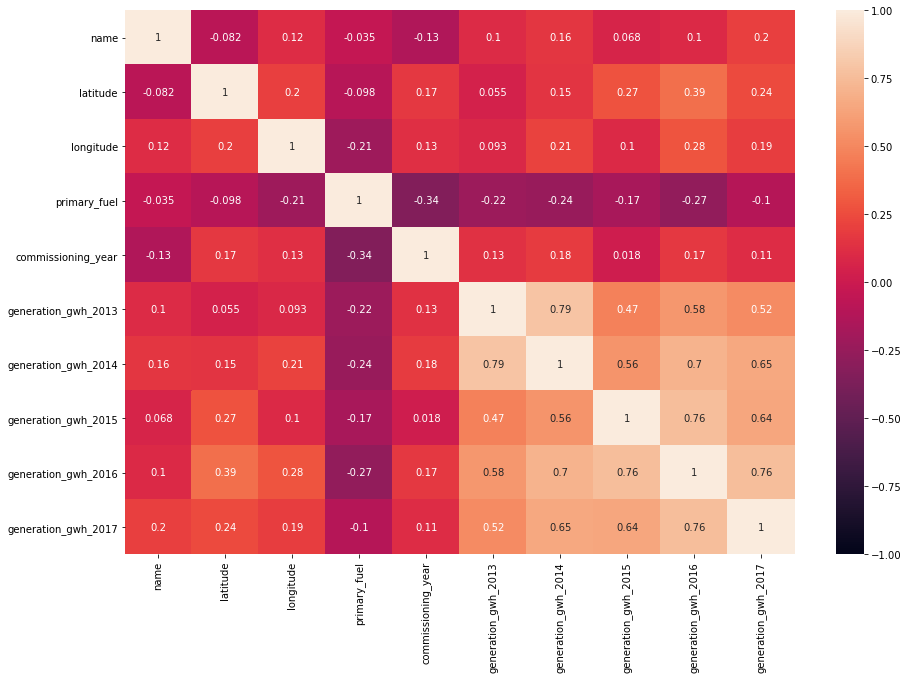

In [205]:
# plotting heatmap to observe the correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

#### Commissioning_year and generation_gwh_2013,2014,2016 are negatively co-related with target variable.

In [206]:
y = df['primary_fuel']
X = df.drop('primary_fuel', axis = 1)

In [207]:
# Data Scaling.  Formula Z=(x-mean)/std
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [208]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range (X_scaled.shape[1])]
vif["features"] = X.columns

#let's check the values
vif

,vif,features
0,1.112038,name
1,1.294544,latitude
2,1.170708,longitude
3,1.119312,commissioning_year
4,2.774308,generation_gwh_2013
5,3.788696,generation_gwh_2014
6,2.606741,generation_gwh_2015
7,4.664511,generation_gwh_2016
8,2.658499,generation_gwh_2017


#### No Multi-collinearity problem exists.

In [209]:
# Split data into train and test. Model will be built on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 51)

In [210]:
y_train.head()

644    0
653    1
603    2
590    1
373    1
Name: primary_fuel, dtype: int32

In [211]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [212]:
y_pred = log_reg.predict(x_test)

In [213]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7058823529411765

In [214]:
# Confusion Matrix
conf_mat =confusion_matrix(y_test,y_pred)
conf_mat

array([[ 1,  0,  2,  0],
       [ 0,  0,  0,  0],
       [ 4,  2, 23,  0],
       [ 0,  0,  2,  0]], dtype=int64)

In [215]:
print('\n----------------Classification Report-------------------')
print (classification_report(y_test,y_pred,digits=2))


----------------Classification Report-------------------
              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.00      0.00      0.00         0
           2       0.85      0.79      0.82        29
           3       0.00      0.00      0.00         2

    accuracy                           0.71        34
   macro avg       0.26      0.28      0.27        34
weighted avg       0.74      0.71      0.72        34



In [216]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(log_reg,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.62962963 0.77777778 0.74074074 0.74074074 0.74074074]
0.7259259259259258
0.050239481356483456


## Decision Tree Classifier

In [217]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = dt_clf.predict(x_test)  
dt_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 100.00%
______________________________________________
CLASSIFICATION REPORT:
             0     1     2    3  accuracy  macro avg  weighted avg
precision  1.0   1.0   1.0  1.0       1.0        1.0           1.0
recall     1.0   1.0   1.0  1.0       1.0        1.0           1.0
f1-score   1.0   1.0   1.0  1.0       1.0        1.0           1.0
support    9.0  14.0  77.0  1.0       1.0      101.0         101.0
______________________________________________
Confusion Matrix:
 [[ 9  0  0  0]
 [ 0 14  0  0]
 [ 0  0 77  0]
 [ 0  0  0  1]]


===================Test Result======================
Accuracy Score: 70.59%
______________________________________________
CLASSIFICATION REPORT:
                  0    1          2    3  accuracy  macro avg  weighted avg
precision  0.400000  0.0   0.956522  0.0  0.705882   0.339130      0.851151
recall     0.666667  0.0   0.758621  0.0  0.705882   0.356322      0.705882
f1-score   0.

In [218]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(dt_clf,X,y,cv=3)
print(score)
print(score.mean())
print(score.std())

[0.46666667 0.8        0.77777778]
0.6814814814814815
0.15216769321610474


## Random Forest Classifier

In [219]:
rand_clf = RandomForestClassifier(random_state=51)
rand_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_train)
rand_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{rand_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = rand_clf.predict(x_test)  
rand_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{rand_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 100.00%
______________________________________________
CLASSIFICATION REPORT:
             0     1     2    3  accuracy  macro avg  weighted avg
precision  1.0   1.0   1.0  1.0       1.0        1.0           1.0
recall     1.0   1.0   1.0  1.0       1.0        1.0           1.0
f1-score   1.0   1.0   1.0  1.0       1.0        1.0           1.0
support    9.0  14.0  77.0  1.0       1.0      101.0         101.0
______________________________________________
Confusion Matrix:
 [[ 9  0  0  0]
 [ 0 14  0  0]
 [ 0  0 77  0]
 [ 0  0  0  1]]


===================Test Result======================
Accuracy Score: 82.35%
______________________________________________
CLASSIFICATION REPORT:
                  0          2    3  accuracy  macro avg  weighted avg
precision  0.333333   0.870968  0.0  0.823529   0.401434      0.772296
recall     0.333333   0.931034  0.0  0.823529   0.421456      0.823529
f1-score   0.333333   0.9000

In [220]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(rand_clf,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.88888889 0.77777778 0.74074074 0.77777778 0.81481481]
0.8
0.05023948135648345


### Using GridSearchCV for hyper parameter tuning on best model (Random Forest Classifier)

In [254]:
# we are tuning three hyperparameters right now, we are passing different values for both parameters
grid_param = {
    'max_depth' : range(2,20,3),              
    'min_samples_leaf' : range (1,20,2),
    'min_samples_split' : range (2,20,2)
}

In [255]:
grid_search = GridSearchCV(estimator=rand_clf,
                          param_grid=grid_param,
                          cv=3,
                          n_jobs =-1)

In [256]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(max_depth=10), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 3),
                         'min_samples_leaf': range(1, 20, 2),
                         'min_samples_split': range(2, 20, 2)})

In [257]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [258]:
rand_clf = RandomForestClassifier(max_depth =5, min_samples_leaf=1, min_samples_split=2)
rand_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [259]:
rand_clf.score(x_test,y_test)

0.8529411764705882

#### After doing hyper parameter tuning on random forest classifier, score improves by approximately 3%.

## KNN Classifier

In [260]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred=knn.predict(x_train)
knn_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{knn_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = knn.predict(x_test)  
knn_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{knn_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 87.13%
______________________________________________
CLASSIFICATION REPORT:
                  0          1          2    3  accuracy   macro avg  \
precision  0.700000   0.833333   0.894118  0.0  0.871287    0.606863   
recall     0.777778   0.357143   0.987013  0.0  0.871287    0.530483   
f1-score   0.736842   0.500000   0.938272  0.0  0.871287    0.543778   
support    9.000000  14.000000  77.000000  1.0  0.871287  101.000000   

           weighted avg  
precision      0.859542  
recall         0.871287  
f1-score       0.850282  
support      101.000000  
______________________________________________
Confusion Matrix:
 [[ 7  0  2  0]
 [ 2  5  7  0]
 [ 1  0 76  0]
 [ 0  1  0  0]]


===================Test Result======================
Accuracy Score: 76.47%
______________________________________________
CLASSIFICATION REPORT:
                  0    1          2    3  accuracy  macro avg  weighted avg
precision 

In [261]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(knn,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.85185185 0.77777778 0.74074074 0.74074074 0.74074074]
0.7703703703703703
0.04319223625811336


## SVC

In [262]:
svc = SVC(kernel = 'poly',C=5)
svc.fit(x_train,y_train)
pred=svc.predict(x_train)
svc_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = svc.predict(x_test)  
svc_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 96.04%
______________________________________________
CLASSIFICATION REPORT:
                  0          1          2    3  accuracy   macro avg  \
precision  1.000000   1.000000   0.950617  1.0  0.960396    0.987654   
recall     0.888889   0.785714   1.000000  1.0  0.960396    0.918651   
f1-score   0.941176   0.880000   0.974684  1.0  0.960396    0.948965   
support    9.000000  14.000000  77.000000  1.0  0.960396  101.000000   

           weighted avg  
precision      0.962352  
recall         0.960396  
f1-score       0.958824  
support      101.000000  
______________________________________________
Confusion Matrix:
 [[ 8  0  1  0]
 [ 0 11  3  0]
 [ 0  0 77  0]
 [ 0  0  0  1]]


===================Test Result======================
Accuracy Score: 73.53%
______________________________________________
CLASSIFICATION REPORT:
             0          2    3  accuracy  macro avg  weighted avg
precision  0.0   0.8

## Gradient Boosting Classifier

In [263]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = gbdt_clf.predict(x_test)  
gbdt_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 100.00%
______________________________________________
CLASSIFICATION REPORT:
             0     1     2    3  accuracy  macro avg  weighted avg
precision  1.0   1.0   1.0  1.0       1.0        1.0           1.0
recall     1.0   1.0   1.0  1.0       1.0        1.0           1.0
f1-score   1.0   1.0   1.0  1.0       1.0        1.0           1.0
support    9.0  14.0  77.0  1.0       1.0      101.0         101.0
______________________________________________
Confusion Matrix:
 [[ 9  0  0  0]
 [ 0 14  0  0]
 [ 0  0 77  0]
 [ 0  0  0  1]]


===================Test Result======================
Accuracy Score: 79.41%
______________________________________________
CLASSIFICATION REPORT:
                  0    1          2    3  accuracy  macro avg  weighted avg
precision  0.400000  0.0   0.925926  0.0  0.794118   0.331481      0.825054
recall     0.666667  0.0   0.862069  0.0  0.794118   0.382184      0.794118
f1-score   0.

In [264]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(gbdt_clf,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.88888889 0.74074074 0.85185185 0.85185185 0.66666667]
0.7999999999999999
0.08314794192830982


## Stochastic Gradient Descent

In [265]:
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=50)
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7647058823529411

In [266]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(sgd,X,y,cv=3)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.68888889 0.75555556 0.77777778]
0.7407407407407408
0.03777051491550212


## PCA

In [267]:
scaler = StandardScaler()
X=df.drop('primary_fuel', axis=1)
X_scaled = scaler.fit_transform(X)

In [268]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[-2.30768586,  0.11000099, -1.06860008, ...,  0.16554025,
        -0.16386636, -0.11437394],
       [ 0.63521818, -0.7052375 , -1.76943858, ...,  1.18312937,
        -0.24109748,  0.55539368],
       [ 3.7474104 , -0.88876381, -1.68691536, ...,  0.20584716,
         0.20030595,  0.11331415],
       ...,
       [ 0.37787661,  1.11999823,  0.69039838, ...,  0.27787018,
        -0.21835983,  0.66958798],
       [-0.63929154, -0.10245408,  1.36249015, ..., -0.24867638,
         0.10257132,  0.09243468],
       [ 2.24968655,  1.19752835,  0.10089273, ...,  2.6349542 ,
         0.22709446, -0.60263595]])

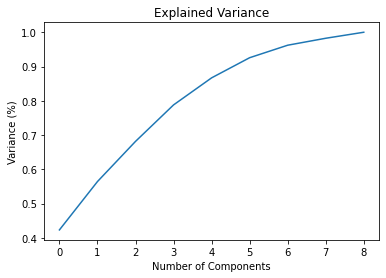

In [269]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.title('Explained Variance')
plt.show()

#### we can see that 95% of the variance is being explained by 6 components

In [270]:
pca=PCA(n_components=6)
new_data=pca.fit_transform(X_scaled)

principal_x=pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6'])

In [271]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6
0,-2.307686,0.110001,-1.068600,-0.267834,-1.444441,-0.455205
1,0.635218,-0.705238,-1.769439,0.700896,-0.451884,-0.300208
2,3.747410,-0.888764,-1.686915,-1.717168,-0.435427,-0.259004
3,-1.812567,-2.060874,-0.104034,0.219713,-0.713935,0.032669
4,-2.045611,-2.011989,-0.034924,0.368773,-0.718089,0.228446
...,...,...,...,...,...,...
130,1.250468,-0.488869,1.382688,0.968777,1.029170,0.495998
131,-1.408992,1.263358,0.573740,-0.347368,1.503644,0.268926
132,0.377877,1.119998,0.690398,1.617174,0.871783,-0.874712
133,-0.639292,-0.102454,1.362490,-0.326458,1.676139,0.687406


## Model Saving

#### Choosing Random Forest Classifier for saving as its has good accuracy over other models.

In [273]:
# saving the model to local system
filename = 'Global Power Plant Database.pickle'
pickle.dump(rand_clf,open(filename,'wb'))

## Predicting for capacity_mw

In [76]:
# reading the data once again
df=pd.read_csv(r'D:\DATATRAINED\DTRND-Project\EVALUATION\2nd week\database_IND.csv')

In [77]:
df.head() # to display top 5 rows

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [78]:
# dropping primary fuel as we have to predict for capacity_mw 
df=df.drop(columns='primary_fuel')

In [79]:
# appending all the generation from 2013-2017 into total generation list
df['total_generation'] = df['generation_gwh_2013'] + df['generation_gwh_2014'] + df['generation_gwh_2015'] + df['generation_gwh_2016'] + df['generation_gwh_2017'] 

In [81]:
df = df.drop(['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'],axis = 1)

In [82]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_data_source,estimated_generation_gwh,total_generation
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,Central Electricity Authority,NaN,3643.093120
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,Central Electricity Authority,NaN,22248.789736


In [83]:
df.describe() # to get high understanding of dataset or to get overview/stats of the dataset

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,estimated_generation_gwh,total_generation
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,0.0,378.000000
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,NaN,12569.845799
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,NaN,20530.476293
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,NaN,0.000000
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,NaN,1406.027038
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,NaN,4353.873000
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,NaN,15722.450662
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,NaN,148533.390000


#### Data is messed up for total generation_gwh as their standard deviation value is greater than mean value.

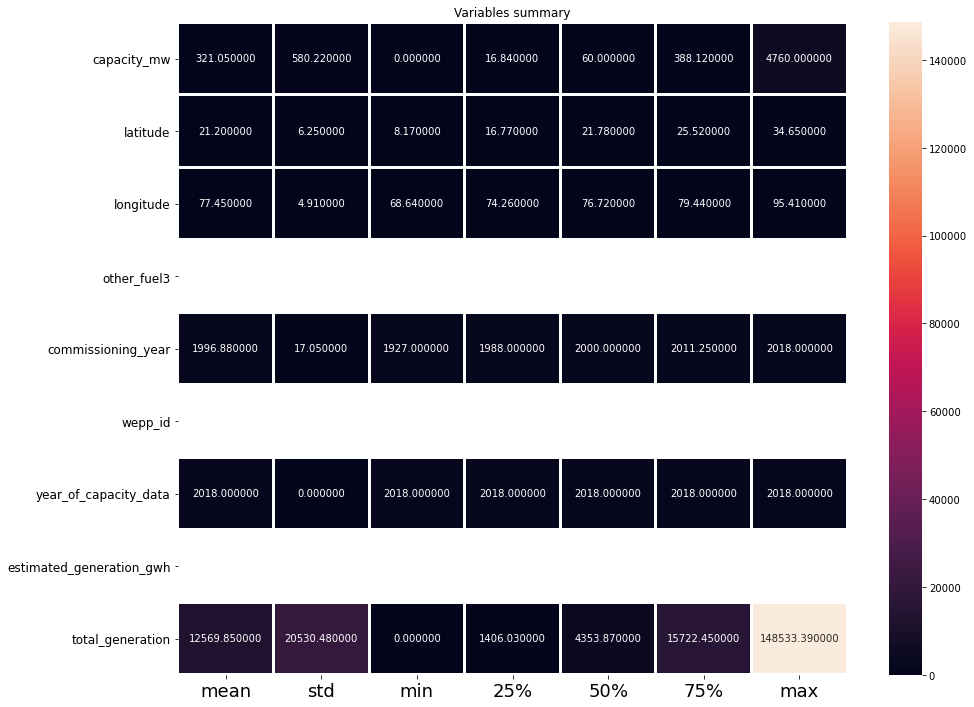

In [84]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

In [85]:
df.isnull().sum()  # to check null values

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_data_source      458
estimated_generation_gwh    908
total_generation            530
dtype: int64

#### There is null values in the dataset

In [86]:
# dropping features with 100%  and above 75% null values 
df=df.drop(columns=['other_fuel3','wepp_id','estimated_generation_gwh','other_fuel1','other_fuel2'])

In [87]:
# dropping column having only character identifier
df=df.drop(columns=['gppd_idnr'])

In [88]:
# dropping this column as it has 62% null values and value is little same as source column.
df=df.drop(columns=['owner'])

In [89]:
# dropping columns having same unique value throughout and url also because it is irrelevant for our prediction
df=df.drop(columns=['country','country_long','name','year_of_capacity_data','generation_data_source','url'])

In [91]:
df=df.drop(columns=['geolocation_source'])

In [92]:
# treating null values 
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())
df['total_generation']=df['total_generation'].fillna(df['total_generation'].mean())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())

In [93]:
df.isnull().sum()  # again checking null values

capacity_mw           0
latitude              0
longitude             0
commissioning_year    0
source                0
total_generation      0
dtype: int64

#### No null values in dataset now

In [94]:
# to count sum of 0's present 
print('Total no of zeros in total_generation is:',sum(df['total_generation']==0))

Total no of zeros in total_generation is: 9


In [96]:
# filling zero with mean value
df['total_generation']=df['total_generation'].replace(0,df['total_generation'].mean())

In [97]:
df_new=['latitude','longitude','total_generation']

In [98]:
from scipy.stats import skew
# to see skewness for every continous column stored in data_new
for col in df_new:
    print(col)
    print(skew(df[col]))

latitude
-0.14714788027659784
longitude
1.127968707647393
total_generation
5.323623527466553


In [102]:
# removing the skewness for continous columns using quantile method
q = df['total_generation'].quantile(0.95)
# removing the top 5% data from the total_generation column
df= df[df['total_generation']<q]

In [107]:
# converting objects into integers
lab_enc = LabelEncoder()
list1 = ['source']
for val in list1:
    df[val] = lab_enc.fit_transform(df[val].astype(str))

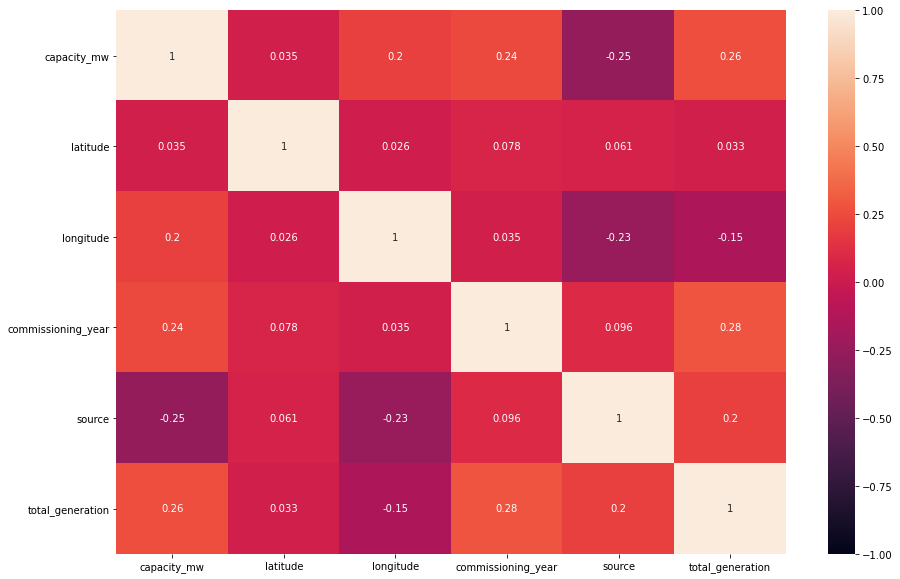

In [108]:
# plotting heatmap to observe the correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

#### commissioning year and total generation is showing co-relation with capacity_mw.

In [109]:
y = df['capacity_mw']
X = df.drop('capacity_mw', axis = 1)

In [110]:
df.head()

,capacity_mw,latitude,longitude,commissioning_year,source,total_generation
0,2.5,28.1839,73.2407,2011.0,109,12569.845799
1,98.0,24.7663,74.6090,2000.0,174,12569.845799
2,39.2,21.9038,69.3732,2000.0,21,12569.845799
3,135.0,23.8712,91.3602,2004.0,22,3643.093120
4,1800.0,21.9603,82.4091,2015.0,22,22248.789736


In [111]:
# Data Scaling.  Formula Z=(x-mean)/std
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range (X_scaled.shape[1])]
vif["features"] = X.columns

#let's check the values
vif

,vif,features
0,1.010375,latitude
1,1.080270,longitude
2,1.103302,commissioning_year
3,1.099091,source
4,1.142615,total_generation


#### No multicollinearity problem exists

In [113]:
# Split data into train and test. Model will be built on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 41)

In [114]:
y_train.head()

225    23.10
776     6.25
1      98.00
21     24.00
405    25.00
Name: capacity_mw, dtype: float64

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

## Linear Regression

In [116]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [117]:
# Adjusted R2 score
regression.score(x_train,y_train)

0.21455536963973998

In [118]:
# lets check how well model fits the test data
regression.score(x_test,y_test)

0.23248197180294405

In [119]:
# To cross verify
y_pred = regression.predict(x_test)

In [120]:
r2_score(y_test,y_pred)

0.23248197180294405

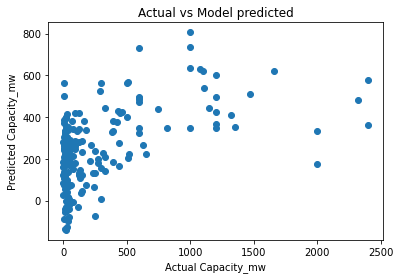

In [121]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Capacity_mw')
plt.ylabel('Predicted Capacity_mw')
plt.title('Actual vs Model predicted')
plt.show()

In [122]:
mean_absolute_error(y_test,y_pred)

256.37279025735035

In [123]:
mean_squared_error(y_test,y_pred)

157957.9712997812

In [124]:
np.sqrt(mean_squared_error(y_test,y_pred))

397.4392674356438

### Using Regularization method to check whether our regression model is overfitting or not

In [136]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

### Lasso Regularization

In [137]:
# LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and dividingby the l2-norm
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [138]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0039275611571586

In [139]:
# now that we have best parameter, lets use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0039275611571586)

In [140]:
lasso_reg.score(x_test,y_test)

0.2324799053730846

### Using Ridge regression model

In [141]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations.
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [142]:
ridgecv.alpha_

0.030999999999999996

In [143]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.030999999999999996)

In [144]:
ridge_model.score(x_test,y_test)

0.23247796123774433

#### So we can see by using different type of regularization,we still are getting the same r2 score. That means our linear regression model has been well trained over the training data and there is no overfitting.

## Let try to improve the accuracy by using different algorithms

## Decision Tree Regressor

In [126]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {dt_reg.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = dt_reg.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {dt_reg.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 99.98%
______________________________________________

===================Test Result======================
Accuracy Score: 41.29%
______________________________________________


In [127]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(dt_reg,X,y,cv=3)
print(score)
print(score.mean())
print(score.std())

[0.23669203 0.25238957 0.16242634]
0.21716931024877684
0.039236021015892464


## Random Forest Regressor

In [128]:
rand_reg = RandomForestRegressor(n_estimators = 100,random_state=41)
rand_reg.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {rand_reg.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = rand_reg.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {rand_reg.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 94.65%
______________________________________________

===================Test Result======================
Accuracy Score: 58.06%
______________________________________________


In [129]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(rand_reg,X,y,cv=3)
print(score)
print(score.mean())
print(score.std())

[0.62492406 0.55873092 0.65970652]
0.6144538319901082
0.041882672866789775


### Using GridSearchCV for hyper parameter tuning on best model (Random Forest Regressor)

In [151]:
# we are tuning three hyperparameters right now, we are passing different values for both parameters
grid_param = {
    'max_depth' : range(1,30,2),              
    'min_samples_leaf' : range (1,30,2),
    'min_samples_split' : range (2,30,2)
}

In [152]:
grid_search = GridSearchCV(estimator=rand_reg,
                          param_grid=grid_param,
                          cv=3,
                          n_jobs =-1)

In [153]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=11, min_samples_leaf=3,
                                             min_samples_split=8),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 30, 2),
                         'min_samples_leaf': range(1, 30, 2),
                         'min_samples_split': range(2, 30, 2)})

In [154]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 21, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [155]:
rand_reg = RandomForestRegressor(max_depth =21, min_samples_leaf=3, min_samples_split=4)
rand_reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=21, min_samples_leaf=3, min_samples_split=4)

In [156]:
rand_reg.score(x_test,y_test)

0.5709595273105849

## KNN Regressor

In [157]:
knn=KNeighborsRegressor(n_neighbors=6)
knn.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {knn.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = knn.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {knn.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 62.62%
______________________________________________

===================Test Result======================
Accuracy Score: 41.69%
______________________________________________


In [158]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(knn,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.62932239 0.61087317 0.51823333 0.61663114 0.5177414 ]
0.5785602840279456
0.04981682815604051


In [159]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(42)

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

y_preds = gbr.predict(x_test)
y_preds

gbr.score(x_test, y_test)

0.5654471941152586

In [160]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(gbr,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.6699232  0.63819523 0.56160689 0.58416073 0.62886478]
0.6165501663047986
0.038824420265064316


In [161]:
#xgboost
from xgboost.sklearn import XGBRegressor
np.random.seed(42)
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
predictions = xgb.predict(x_test)

xgb.score(x_test,y_test)

0.5361133727615282

## Model Saving

#### Choosing Random Forest Regressor as it is giving good accuracy than other models.

In [162]:
# saving the model to local system
filename = 'Global Power Plant Database1.pickle'
pickle.dump(rand_reg,open(filename,'wb'))